# Reinforcement Learning: An Introduction 2nd Edition - Example 6.6

Environment: [Example 6.6: Cliff Walking](http://incompleteideas.net/book/bookdraft2017nov5.pdf#page=126)

## Source Codes

* [Q-learning](../rl/rl_algorithm/q_learning.py)
* [Sarsa](../rl/rl_algorithm/sarsa.py)
* [Cliff Walking](../rl/environment/cliff_walking.py)

## Environment Settings

I use same settings of the environment.

Observation:
* $4 \times 12$ grid
* cliff - 3 row 1 to 10 columns 

Actions:
* up  
* down  
* left  
* right  

Hyperparameters:
* $\epsilon = 0.1$  
* $\alpha = 0.5$  
* $\gamma = 1$  
* 500 episodes

Numpy Random Seed: 0

## Source Codes

In [7]:
import sys
import os
sys.path.append(os.pardir)

import numpy as np
import rl
from rl.environment import CliffWalking
import matplotlib.pyplot as plt

np.random.seed(0)

### Define test function

In [8]:
def test_env(env: CliffWalking, sarsa: rl.Sarsa, q_learnig: rl.QLearning):
    shape_x, shape_y = env.obs_shape
    
    start_state = env.reset()
    goal_state = env.goal_state
    
    current_state = start_state
    q_learning_trace_states = [current_state]
    q_learning_total_rewards = 0
    
    # start an episode with q-learning
    for i in range(1000):
        current_action = q_learnig.get_action(tuple(current_state))
        next_state, reward, terminated = env.step(current_action)
        q_learning_trace_states.append(next_state)
        q_learning_total_rewards += reward
        
        if terminated:
            break
        
        current_state = next_state
        

    current_state = env.reset()
    sarsa_trace_states = [current_state]
    sarsa_total_rewards = 0
    
    # start an episode with sarsa
    for i in range(1000):
        current_action = sarsa.get_action(tuple(current_state))
        next_state, reward, terminated = env.step(current_action)
        sarsa_trace_states.append(next_state)
        sarsa_total_rewards += reward
        
        if terminated:
            break
        
        current_state = next_state
    
    print(f"sarsa: {sarsa_total_rewards}, q-learning: {q_learning_total_rewards}")
    
    q_learning_trace_states = np.array(q_learning_trace_states)
    sarsa_trace_states = np.array(sarsa_trace_states)
    cliff = np.transpose(np.where(env.cliff_area))
    
    # draw grid world
    plt.plot(sarsa_trace_states[:,1], sarsa_trace_states[:,0], linestyle="--", label="Sarsa")
    plt.plot(q_learning_trace_states[:,1], q_learning_trace_states[:,0], "violet", linestyle="--", label="Q-learning")
    plt.plot(cliff[:,1], cliff[:,0], "r", label="Cliff Area")
    plt.scatter(start_state[1], start_state[0], c="red", marker="x")
    plt.scatter(goal_state[1], goal_state[0], c="black", marker="x")
    plt.axis([-1, shape_y, -1, shape_x])
    plt.xticks(range(-1, shape_y + 1))
    plt.yticks(range(-1, shape_x + 1))
    plt.grid()
    plt.tick_params(labelbottom=False, bottom=False, top=True, labeltop=True)
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

### Before training

* red: cliff area
* blue: sarsa
* violet: q-learning
* red x dot: start state
* black x dot: goal state

In [9]:
# Hyperparameters
gamma = 1
alpha = 0.5
epsilon = 0.1

env = CliffWalking()

sarsa = rl.Sarsa(
    env.obs_shape,
    env.action_count,
    terminal_states=[tuple(env.goal_state)],
    alpha=alpha,
    gamma=gamma,
    epsilon=epsilon
)

q_learning = rl.QLearning(
    env.obs_shape,
    env.action_count,
    terminal_states=[tuple(env.goal_state)],
    alpha=alpha,
    gamma=gamma,
    epsilon=epsilon
)

sarsa: -1000.0, q-learning: -1000.0


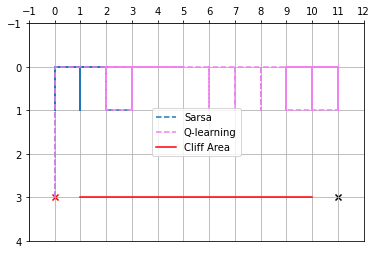

In [10]:
test_env(env, sarsa, q_learning)

### Training

In [11]:
def train_cliff_walking(env: CliffWalking, agent: rl.Agent):
    episodes_count = 500
    rewards_arr = []
    
    for episode in range(episodes_count):
        agent.start_episode()
        current_state = env.reset()
        terminated = False
        total_rewards = 0
        
        # start an episode
        while not terminated:
            current_action = int(agent.get_action(tuple(current_state)))
            # take action a; observe r, s'
            next_state, reward, terminated = env.step(current_action)
            transition = rl.Transition(
                current_state,
                current_action,
                next_state,
                reward
            )
            # update the agent
            agent.update(transition)
            
            current_state = next_state
            total_rewards += reward
            
        agent.end_episode()
        rewards_arr.append(total_rewards)
        
    return rewards_arr

sarsa: -16.0, q-learning: -12.0


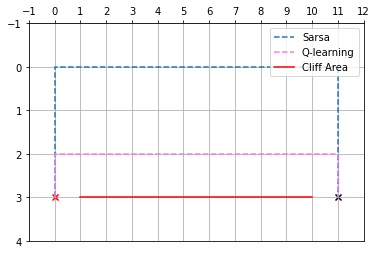

average rewards of last 50 rewards


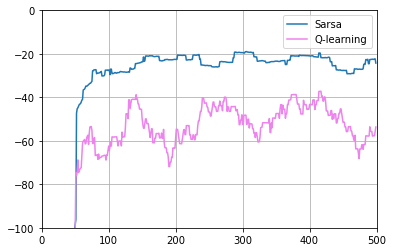

In [12]:
sarsa_rewards = train_cliff_walking(env, sarsa)
q_learning_rewards = train_cliff_walking(env, q_learning)

# greedy policy for test
q_learning.epsilon = 0
sarsa.epsilon = 0
test_env(env, sarsa, q_learning)

# training rewards graph
print("average rewards of last 50 rewards")
plt.plot(rl.util.average_last_data(sarsa_rewards, 50), label="Sarsa")
plt.plot(rl.util.average_last_data(q_learning_rewards, 50), "violet", label="Q-learning")
plt.axis([0, 500, -100, 0])
plt.legend()
plt.grid()
plt.show()